In [ ]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.datasets import make_regression, make_classification
from sklearn.utils import shuffle

# Newton Raphson Method

**<font color='blue'> 1.a. Write a python function that returns the value of $f(x)=x^3-2x-5$.<br>1.b. Write a python function that returns the value of the derivative of $f(x)$.**

In [ ]:
def f(x):
    return x**3 - 2*x - 5

def f_dx(x):
    return 3*x**2 - 2

**<font color='blue'> 2.a. Display the graph of $f(x)=x^3-2x-5$ between x = -5 and x = 5.<br>2.b. Graphically, what could be the solution of $f(x)=0$ ?**

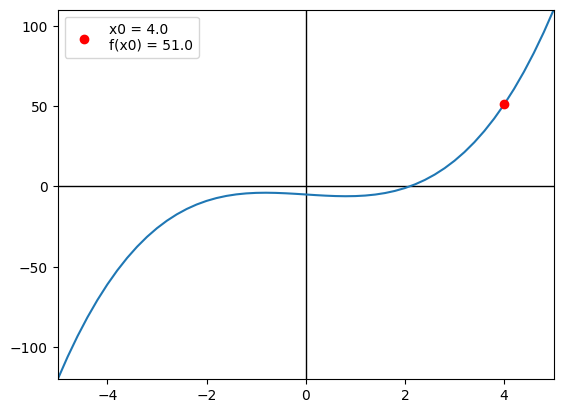

In [ ]:
def plot_f(x0=None):
    x = np.arange(-5,5.2,0.2)
    f_array = np.vectorize(f)
    y = f_array(x)

    fig, ax = plt.subplots()
    ax.plot([np.min(x),np.max(x)],[0,0], c='black', linewidth=1, zorder=-1)
    ax.plot([0,0], [np.min(y),np.max(y)], c='black', linewidth=1, zorder=-1)
    ax.plot(x,y, zorder=0)
    if x0:
        ax.scatter(x0, f(x0), c='red', label=f'x0 = {x0:.6}\nf(x0) = {f(x0):.6}', zorder=1)

    ax.set_xlim([np.min(x),np.max(x)])
    ax.set_ylim([np.min(y),np.max(y)])

    plt.legend()
    plt.show()

plot_f(4.0)

The Newton-Raphson method is a powerful and widely used tool for finding roots of real-valued functions.<br> It is an iterative approach, meaning it starts with an initial guess and refines this guess through repeated iterations.<br><br>

<center><font size=5>
$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$<br>

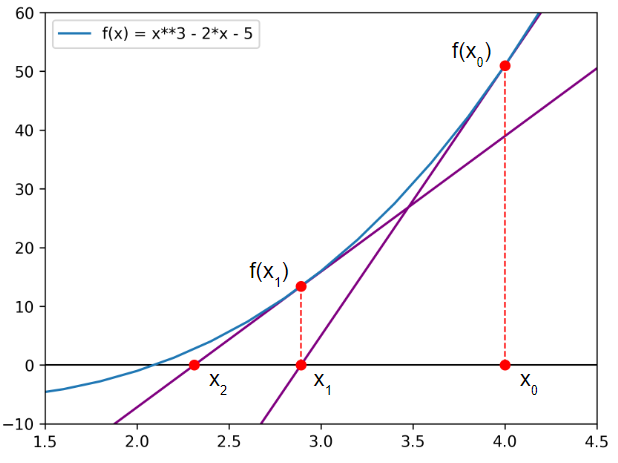 </center>

**<font color='blue'> 3. Write a function that computes the Newton Raphson formula.**

In [ ]:
def newton_raphson(x):
    return x - f(x)/f_dx(x)

**<font color='blue'> 4. Write a function that takes an initial guess of x0 and iteratively updates it until $f(x) \approx 0$.<br> Count the number of iterations.**

*Tips: You can iterate until $f(x) < \epsilon$ with ϵ a value close to 0.*

In [ ]:
def main(x0=4, max_iter=100, eps=1e-5):
    iter = 0
    while np.abs(f(x0)) > eps and iter < max_iter:
        x0 = newton_raphson(x0)
        iter += 1
    print(f"Stopped after {iter} iterations.")
    return x0

**<font color='blue'> 5.a. What is the final value of x for $f(x) = 0$ ?<br>5.b. Add this value on the graph.<br>5.c. Try other initial guesses, what happens ?**

Stopped after 33 iterations.


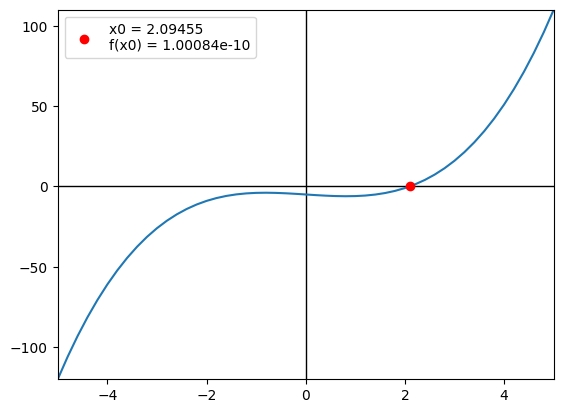

In [ ]:
x_0 = main(-4)
plot_f(x_0)

# Newton's Method

In [ ]:
n_f = 5
n_t = 1
n_s = 1000
X, y = make_regression(n_samples=n_s,
                       n_features=n_f,
                       n_targets=n_t,
                       noise=0.5,
                       random_state=42)

df = pd.DataFrame(np.concatenate([X, y[...,np.newaxis]], axis=1),
                  columns = [f'X_{i}' for i in range(1,n_f+1)]+['y'])
df.head()

,X_1,X_2,X_3,X_4,X_5,y
0,2.056544,0.606851,0.482688,-1.130888,0.420094,74.738571
1,-0.799192,-0.645964,-0.182896,-0.482744,1.374876,-42.051796
2,1.076007,-0.796026,-0.751969,0.021312,-0.319054,-24.700748
3,-0.103255,-0.828497,1.489863,-1.643189,-1.600904,-86.950690
4,-2.063403,0.503252,-0.645572,-0.317350,-1.661083,-86.012064


In order to compute the **Newton's method** we need to choose:


*   A method to predict the values
*   A cost function to estimate the errors made by the prediction


The method used to predict the values is the **multivariate linear regression** with 5 features:<br><br>

<font size="+1"><center>$\begin{align*}y_{pred} &= \theta_1x_1 + \theta_2x_2 + \theta_3x_3 + \theta_4x_4 + \theta_5x_5 + \theta_0\\
&= X \cdot \Theta^T+\theta_0
\end{align*}$</center><br>

with $X \cdot \Theta^T$ the dot product of the following matrices:

<font size="+1"><center>$\begin{align*}
\Theta^T &= \begin{bmatrix} \theta_1 \\ \theta_2 \\ \theta_3 \\ \theta_4\\ \theta_5 \\
\end{bmatrix}\\
X &= \begin{bmatrix}x_{0,1} & x_{0,2} & x_{0,3} & x_{0,4} & x_{0,5}\\
x_{1,1} & x_{1,2} & x_{1,3} & x_{1,4} & x_{1,5}\\
\vdots & \vdots & \vdots & \vdots & \vdots\\
x_{m,1} & x_{m,2} & x_{m,3} & x_{m,4} & x_{m,5}\\
\end{bmatrix}
\end{align*}$</center><br>

The **cost function** used in this example is the **mean squared error**. <br>
It is a convex, defined and derivable function which is perfect for the Gradient Descent method.<br>
It can be expressed using the following formula:<br><br>

<font size="+1"><center>$J(\Theta) = \frac {1}{m} \sum_{i=1}^{m}(y_{pred,i}-y_{true,i})^2$</center><br>

We can inject the linear regression into the cost function in order to get:<br><br>

<font size="+1"><center>$J(\Theta)=\frac {1}{m} \sum_{i=1}^{m}((X_i \cdot \Theta^T+\theta_0) - y_{true,i})^2$</center><br>

with $m$ the number of instances in the dataset, <br> $\Theta$ and $\theta_{0}$ the parameter of the model, <br>$y_{true,i}$ the label of the i-th instance, <br> $X_{i}$ the features of the i-th instance.<br><br>

Here is the **Gradient** for the multivariate linear regression:<br><br>

<font size="+1"><center>$\bigtriangledown J(\Theta)=\begin{bmatrix}
\frac{\partial J(\theta)}{\partial\theta_0}\\
\frac{\partial J(\theta)}{\partial\theta_1}\\
\vdots\\
\frac{\partial J(\theta)}{\partial\theta_5}
\end{bmatrix}$</center><br>

<font size="+1"><center>$\bigtriangledown J(\Theta)=\begin{bmatrix}
\frac {2}{m} \sum_{i=1}^{m}X_i \cdot \Theta^T + \theta_0 - y^{(i)}\\
\frac {2}{m} \sum_{i=1}^{m}\color{red}{x_{i,1}} (X_i \cdot \Theta^T+\theta_0 - y^{(i)})\\
\vdots\\
\frac {2}{m} \sum_{i=1}^{m}\color{red}{x_{i,5}} (X_i \cdot \Theta^T+\theta_0 - y^{(i)})
\end{bmatrix}$</center><br>

Here is the **Hessian** for the multivariate linear regression with 5 features:<br><br>

<font size="+1"><center>$H(J)(\Theta) = \begin{bmatrix}
\frac{\partial^2 J(\Theta)}{\partial \theta_0^2} & \frac{\partial^2 J(\Theta)}{\partial \theta_0 \partial \theta_1} &\cdots & \frac{\partial^2 J(\Theta)}{\partial \theta_0 \partial \theta_5} \\
\frac{\partial^2 J(\Theta)}{\partial \theta_1 \partial \theta_0} & \frac{\partial^2 J(\Theta)}{\partial \theta_1^2} &\cdots & \frac{\partial^2 J(\Theta)}{\partial \theta_1 \partial \theta_5} \\
\vdots & \vdots &\ddots & \vdots \\
\frac{\partial^2 J(\Theta)}{\partial \theta_5 \partial \theta_0} & \frac{\partial^2 J(\Theta)}{\partial \theta_5 \partial \theta_1} &\cdots & \frac{\partial^2 J(\Theta)}{\partial \theta_5^2}
\end{bmatrix}$</center><br>

Which gives:

<font size="+1"><center>$H(J)(\Theta) = \begin{bmatrix}
\frac {2}{m} \sum_{i=1}^{m} 1 & \frac {2}{m} \sum_{i=1}^{m} x_{i,1} &\cdots & \frac {2}{m} \sum_{i=1}^{m} x_{i,5} \\
\frac {2}{m} \sum_{i=1}^{m} x_{i,1} & \frac {2}{m} \sum_{i=1}^{m} x_{i,1}^2 &\cdots & \frac {2}{m} \sum_{i=1}^{m} x_{i,1}x_{i,5} \\
\vdots & \vdots & \ddots & \vdots \\
\frac {2}{m} \sum_{i=1}^{m} x_{i,5} & \frac {2}{m} \sum_{i=1}^{m} x_{i,5}x_{i, 1} & \cdots & \frac {2}{m} \sum_{i=1}^{m} x_{i,5}^2
\end{bmatrix}$</center><br>

The first row and column of the Hessian matrix are related to the bias and behave differently than the rest of the matrix.<br>Indeed, $\frac{\partial^2 J(\Theta)}{\partial \theta_0^2}$ is $\frac{\partial\left (\frac {2}{m} \sum_{i=1}^{m}X_i \cdot \Theta^T + \theta_0 - y^{(i)} \right)}{\partial \theta_0}$ which is linear relative to $\theta_0$ and gives $\frac {2}{m} \sum_{i=1}^{m} 1$.<br>
Similarly, $\frac{\partial^2 J(\Theta)}{\partial \theta_0 \partial \theta_1}$ is $\frac{\partial\left (\frac {2}{m} \sum_{i=1}^{m}X_i \cdot \Theta^T + \theta_0 - y^{(i)} \right)}{\partial \theta_1}$ which gives $\frac {2}{m} \sum_{i=1}^{m}x_{i,1}$<br>

Some thoughts about the bias.<br>

> *In the case of linear regression, the Hessian matrix is usually not used for updating the bias term because the bias term is a scalar value added to the weighted sum of the features and its impact on the loss function is linear. Therefore, its gradient is straightforward to calculate and usually does not require the second-order derivative information that the Hessian provides.*

Now, we can use the Newton's Method to iteratively update the weights using the following formula:<br><br>

<font size="+1"><center>$\Theta_{n+1} = \Theta_{n} - H(J)(\Theta_{n})^{-1}\cdot\bigtriangledown J(\Theta_{n})$</center><br>


**<font color="blue"> 1.a. Create a new column in X full of 1. This column represents the bias column.<br>1.b. Initialize the parameters of the model to 0.<br>1.c. Check the shapes.**

*Tips: Create a numpy array W that contains all the parameters of the features and the bias.<br> The shape of W should be (6,).*

In [ ]:
X_with_bias = np.c_[X, np.ones(X.shape[0])]
W = np.zeros(X_with_bias.shape[1])

In [ ]:
print(f"X shape: {X_with_bias.shape}")
print(f"y shape: {y.shape}")
print(f"W shape: {W.shape}")

X shape: (1000, 6)
y shape: (1000,)
W shape: (6,)


**<font color="blue"> 2.a. Create a predict function for the multivariate linear regression.
<br>2.b. Check the shape of the prediction, it should be (1000,).
<br>2.c. Create a function that computes the mean squared error.**

*Tips: The predict function should now takes the new X and W as input since the bias is included in W.*

In [ ]:
def predict(X, W):
    return np.dot(X, W)

def mean_squared_error(y, y_pred):
    sq_error = (y_pred - y)**2
    return np.mean(sq_error)

In [ ]:
y_pred = predict(X_with_bias, W)
y_pred.shape

(1000,)

**<font color="blue"> 3.a. Create a gradient function that computes the gradient vector of the multivariate linear regression.
<br>3.b. Check the shape of the gradient. It should be (6,).**

*Tips: Be careful of the shapes of X (1000, 6) and the error measurement (1000,).<br> There is one error per instance of the dataset (i.e. per line) but there are 5 features plus the bias.<br> Each feature - and the bias column - have to be multipied by the error.*

In [ ]:
def gradient(X, y, y_pred):
    return 2 * np.dot(X.T, (y_pred - y)) / X.shape[0]
gradient(X_with_bias,y,y_pred)

array([-50.60233663, -94.59574874, -38.42013325, -48.42272538,
       -37.81959307,  -1.74462272])

**<font color="blue"> 4.a. Create a hessian function that computes the Hessian matrix of the multivariate linear regression and returns its inverse.
<br>4.b. Check the shape of the inverse of the Hessian matrix. It should be (6,6).**

*Tips: You can use the `np.linalg.inv(arr)` function from the numpy library.*

In [ ]:
def hessian(X):
    h_w = 2 * np.dot(X.T, X) / X.shape[0]
    return np.linalg.inv(h_w)
hessian(X)

array([[ 5.43732298e-01,  6.00861073e-04,  4.98498592e-03,
         7.29289300e-03,  1.27873199e-02],
       [ 6.00861073e-04,  4.96963916e-01, -2.94379098e-02,
         4.63533555e-04,  3.49245590e-03],
       [ 4.98498592e-03, -2.94379098e-02,  5.03371607e-01,
        -7.32061920e-03,  9.52916683e-03],
       [ 7.29289300e-03,  4.63533555e-04, -7.32061920e-03,
         5.11550082e-01, -4.43526704e-03],
       [ 1.27873199e-02,  3.49245590e-03,  9.52916683e-03,
        -4.43526704e-03,  4.72875730e-01]])

**<font color="blue"> 5. Create an update_weights function that computes one step of the Newton's method with the Gradient and the inverse of the Hessian matrix and returns the updated weights.**

In [ ]:
def update_weights(X, y, y_pred, W):

    G = gradient(X,y,y_pred)
    H = hessian(X)

    W -= np.dot(H, G)

    return W

In [ ]:
W = update_weights(X_with_bias, y, y_pred, W)
print(f"W values: {W}")

W values: [-3.62541244e+31 -5.83939871e+31 -2.13130970e+31 -3.13560726e+31
 -2.41008867e+31  3.91163130e+28]


**<font color="blue">6.a. Create a main function that runs multiple Newton's method step and stops:**

*   <font color="blue">**After a maximum number of iterations is reached;**
*   <font color="blue">**If the loss function improvement between two steps is small enough.**

**<font color="blue">6.b. Display the evolution of the loss function values on a graph.**

In [ ]:
def main(X, y, W, eps = 1e-5, max_iter = 100):
    weight_history = [W.tolist()]
    cost_history = [np.inf]

    iter = 0
    while iter != max_iter:
        y_pred = predict(X, W)

        W = update_weights(X, y, y_pred, W)
        weight_history.append([W.tolist()])

        cost = mean_squared_error(y, y_pred)
        cost_history.append(cost)

        w_values = " ".join([f"w{i+1}({w:+7.3f})" if i != 5 else f"bias({w:+7.3f})" for i, w in enumerate(W)])
        print(f"iter : {iter:+4}     W : {w_values}     cost : {cost:.5}")

        if abs(cost_history[iter] - cost_history[iter-1]) < eps :
            break

        iter+=1

    return {"weights": weight_history, "cost": cost_history}

iter :   +0     W : w1(+28.599) w2(+46.065) w3(+16.813) w4(+24.736) w5(+19.012) bias( -0.031)     cost : 4184.0
iter :   +1     W : w1(+28.599) w2(+46.065) w3(+16.813) w4(+24.736) w5(+19.012) bias( -0.031)     cost : 0.26738
iter :   +2     W : w1(+28.599) w2(+46.065) w3(+16.813) w4(+24.736) w5(+19.012) bias( -0.031)     cost : 0.26738
iter :   +3     W : w1(+28.599) w2(+46.065) w3(+16.813) w4(+24.736) w5(+19.012) bias( -0.031)     cost : 0.26738


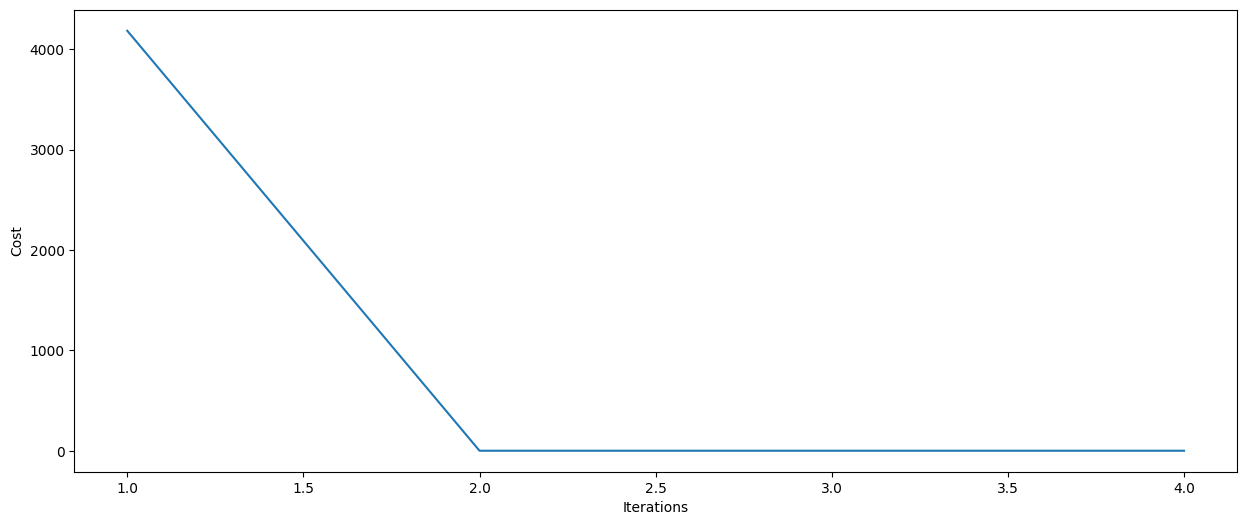

In [ ]:
W = np.zeros(X_with_bias.shape[1])

history = main(X_with_bias, y, W)

fig, ax = plt.subplots(figsize=(15,6))

ax.plot(np.arange(len(history['cost'])),
         history['cost'])

ax.set_ylabel('Cost')
ax.set_xlabel('Iterations')

plt.show()

# BFGS - Quasi Newton Method

In [ ]:
n_f = 5
n_t = 1
n_s = 1000
X, y = make_regression(n_samples=n_s,
                       n_features=n_f,
                       n_targets=n_t,
                       noise=0.5,
                       random_state=42)

df = pd.DataFrame(np.concatenate([X, y[...,np.newaxis]], axis=1),
                  columns = [f'X_{i}' for i in range(1,n_f+1)]+['y'])
df.head()

,X_1,X_2,X_3,X_4,X_5,y
0,2.056544,0.606851,0.482688,-1.130888,0.420094,74.738571
1,-0.799192,-0.645964,-0.182896,-0.482744,1.374876,-42.051796
2,1.076007,-0.796026,-0.751969,0.021312,-0.319054,-24.700748
3,-0.103255,-0.828497,1.489863,-1.643189,-1.600904,-86.950690
4,-2.063403,0.503252,-0.645572,-0.317350,-1.661083,-86.012064


In order to compute the **Newton's method** we need to choose:


*   A method to predict the values
*   A cost function to estimate the errors made by the prediction


The method used to predict the values is the **multivariate linear regression** with 5 features:<br><br>

<font size="+1"><center>$\begin{align*}y_{pred} &= \theta_1x_1 + \theta_2x_2 + \theta_3x_3 + \theta_4x_4 + \theta_5x_5 + \theta_0\\
&= X \cdot \Theta^T+\theta_0
\end{align*}$</center><br>

with $X \cdot \Theta^T$ the dot product of the following matrices:

<font size="+1"><center>$\begin{align*}
\Theta^T &= \begin{bmatrix} \theta_1 \\ \theta_2 \\ \theta_3 \\ \theta_4\\ \theta_5 \\
\end{bmatrix}\\
X &= \begin{bmatrix}x_{0,1} & x_{0,2} & x_{0,3} & x_{0,4} & x_{0,5}\\
x_{1,1} & x_{1,2} & x_{1,3} & x_{1,4} & x_{1,5}\\
\vdots & \vdots & \vdots & \vdots & \vdots\\
x_{m,1} & x_{m,2} & x_{m,3} & x_{m,4} & x_{m,5}\\
\end{bmatrix}
\end{align*}$</center><br>

The **cost function** used in this example is the **mean squared error**.<br>
It can be expressed using the following formula:<br><br>

<font size="+1"><center>$J(\Theta) = \frac {1}{m} \sum_{i=1}^{m}(y_{pred,i}-y_{true,i})^2$</center><br>

We can inject the linear regression into the cost function in order to get:<br><br>

<font size="+1"><center>$J(\Theta)=\frac {1}{m} \sum_{i=1}^{m}((X_i \cdot \Theta^T+\theta_0) - y_{true,i})^2$</center><br>

with $m$ the number of instances in the dataset, <br> $\Theta$ and $\theta_{0}$ the parameter of the model, <br>$y_{true,i}$ the label of the i-th instance, <br> $X_{i}$ the features of the i-th instance.<br><br>

Here is the **Gradient** for the multivariate linear regression:<br><br>

<font size="+1"><center>$\bigtriangledown J(\Theta)=\begin{bmatrix}
\frac{\partial J(\theta)}{\partial\theta_0}\\
\frac{\partial J(\theta)}{\partial\theta_1}\\
\vdots\\
\frac{\partial J(\theta)}{\partial\theta_5}
\end{bmatrix}$</center><br>

<font size="+1"><center>$\bigtriangledown J(\Theta)=\begin{bmatrix}
\frac {2}{m} \sum_{i=1}^{m}X_i \cdot \Theta^T + \theta_0 - y^{(i)}\\
\frac {2}{m} \sum_{i=1}^{m}\color{red}{x_{i,1}} (X_i \cdot \Theta^T+\theta_0 - y^{(i)})\\
\vdots\\
\frac {2}{m} \sum_{i=1}^{m}\color{red}{x_{i,5}} (X_i \cdot \Theta^T+\theta_0 - y^{(i)})
\end{bmatrix}$</center><br>

The BFGS algorithm is a quasi-newton method and uses an approximation of the Hessian matrix instead of computing it.<br> Here is the formula:

<font size="+1"><center>$H_{n+1} = H_n + \left( I - \frac{s_ny_n^T}{y_n^Ts_n} \right)H_n\left(I - \frac{y_ns_n^T}{y_n^Ts_n}\right) + \frac{s_ns_n^T}{y_n^Ts_n}$</center><br>

with <font size="+1"><center>$\begin{align*}s_n &= \Theta_{n+1} - \Theta_{n} \\ y_n &= \bigtriangledown J(\Theta_{n+1}) - \bigtriangledown J(\Theta_{n})\end{align*}$</center><br>

**<font color="blue"> 1. Create a mean squared error function that takes X, Y and W as inputs, computes the prediction and then the mean squared error.**

In [ ]:
def mse(X, Y, W):
    return np.mean((np.dot(X, W) - Y) ** 2)

**<font color="blue"> 2. Create function that takes X, Y and W as inputs adn computes the gradient.**

In [ ]:
def gradient(X, Y, W):
    y_pred = np.dot(X, W)
    d_w = 2 * np.dot(X.T, y_pred - Y) / len(Y)
    return d_w

**<font color="blue"> 3. Create a function that takes the previous approximation of the Hessian matrix, $s_n$ and $y_n$ and returns the next approximation.**

In [ ]:
def bfgs_update(H, s, y, eps=1e-8):
    I = np.eye(len(H))
    rho = 1 / (np.dot(y.T, s) + eps)
    V = I - rho * np.outer(s, y.T)
    H_next = np.dot(np.dot(V, H), V.T) + rho * np.outer(s, s.T)
    return H_next

The BFGS algorithm updates the weights using the following formula:

<font size="+1"><center>$\begin{align*}p_n &= - H_n\bigtriangledown L(\Theta_n) \\ \Theta_{n+1} &= \Theta_n + \alpha_n p_n \end{align*}$</center><br>

We can find the alpha parameter using the Wolfe conditions:

<font size="+1"><center>$\tag{Armijo Condition} L(\Theta + \alpha p) \leq L(\Theta)+c_1\alpha\bigtriangledown L(\Theta)^Tp$</center>

<font size="+1"><center>$\tag{Curvature Condition} \bigtriangledown L(\Theta + \alpha p)^Tp \geq c_2 \bigtriangledown L(\Theta)^Tp  $</center><br>

**<font color="blue"> 4. Create a function that takes X, Y, W, p, d_w (the gradient), $c_1$ and $c_2$, searches for the alpha parameter using the Wolfe conditions (Armijo and Curvature) and return the updated weights when the correct alpha is found. The function should start with alpha = 1.0 and updates it by dividing it by 2 until the two conditions are True.**

*Tips: Remember, $p_n = - H_n\bigtriangledown L(\Theta_n)$ and $\Theta_{n+1} = \Theta_n + \alpha_n p_n$.<br> Additionally,  $c_1$ should be between 0 and 1. $c_2$ should be between 0.9 and 1.*

In [ ]:
def line_search(X, Y, W, p, d_w, c1=1e-4, c2=0.9):
    alpha = 1.0
    while True:
        W_new = W + alpha * p
        if mse(X, Y, W_new) > mse(X, Y, W) + c1 * alpha * np.dot(d_w.T, p):  # Armijo Condition
            alpha *= 0.5
        else:
            d_w_new = gradient(X, Y, W_new)
            if np.dot(d_w_new.T, p) < c2 * np.dot(d_w.T, p):                 # Curvature Condition
                break
            else:
                alpha *= 0.5
    return W_new


**<font color="blue"> 5. Create a main function that: <br>**

*   **<font color="blue">Computes the gradient.**
*   **Computes $p_n$.**
*   **Updates the weight using the previous function.**
*   **Computes $s_n$ and $y_n$.**
*   **Updates the approximation of the hessian matrix.**

*Tips: Don't forget to stop when the algorithm doesn't improve the loss anymore.*



In [ ]:
def bfgs_linear_regression(X, Y, c1=1e-4, c2=0.9, max_iter=200, tol=1e-5):
    X = np.c_[X, np.ones(X.shape[0])]
    W = np.zeros(X.shape[1])
    H = np.eye(X.shape[1])

    for i in range(max_iter):
        d_w = gradient(X, Y, W)
        p = -np.dot(H, d_w)
        W_new = line_search(X, Y, W, p, d_w, c1, c2)
        s = W_new - W
        y = gradient(X, Y, W_new) - d_w

        if np.linalg.norm(s) < tol or np.dot(y.T, s) < tol or np.linalg.norm(d_w) < tol:
            break

        H = bfgs_update(H, s, y)
        W = W_new

        if i % 5 == 0:
            print(f"Iteration {i}: MSE = {mse(X, Y, W)}")

    return W

W_f = bfgs_linear_regression(X, y, c1=1e-2, c2=0.9)

Iteration 0: MSE = 3676.60586993765
Iteration 5: MSE = 1922.9338420491038
Iteration 10: MSE = 1005.6467141760484
Iteration 15: MSE = 524.547282412485
Iteration 20: MSE = 273.92416671311423
Iteration 25: MSE = 143.58583850195166
Iteration 30: MSE = 75.3961914386659
Iteration 35: MSE = 39.64827933068901
Iteration 40: MSE = 20.89977467582837
Iteration 45: MSE = 11.070342748647908
Iteration 50: MSE = 5.923472553896077
Iteration 55: MSE = 3.2305472721364086
Iteration 60: MSE = 1.8206575070509712
Iteration 65: MSE = 1.0818454238132662
Iteration 70: MSE = 0.6944992767804783
Iteration 75: MSE = 0.4913784654195298
Iteration 80: MSE = 0.38485542301649706
Iteration 85: MSE = 0.3289897011631569
Iteration 90: MSE = 0.29969073718053385
Iteration 95: MSE = 0.28432472074989085
Iteration 100: MSE = 0.2762659011949694
Iteration 105: MSE = 0.27203938795189203
Iteration 110: MSE = 0.26982275651132964
Iteration 115: MSE = 0.26866022407550827


# L-BFGS

In [ ]:
n_f = 5
n_t = 1
n_s = 1000
X, y = make_regression(n_samples=n_s,
                       n_features=n_f,
                       n_targets=n_t,
                       noise=0.5,
                       random_state=42)

df = pd.DataFrame(np.concatenate([X, y[...,np.newaxis]], axis=1),
                  columns = [f'X_{i}' for i in range(1,n_f+1)]+['y'])
df.head()

,X_1,X_2,X_3,X_4,X_5,y
0,2.056544,0.606851,0.482688,-1.130888,0.420094,74.738571
1,-0.799192,-0.645964,-0.182896,-0.482744,1.374876,-42.051796
2,1.076007,-0.796026,-0.751969,0.021312,-0.319054,-24.700748
3,-0.103255,-0.828497,1.489863,-1.643189,-1.600904,-86.950690
4,-2.063403,0.503252,-0.645572,-0.317350,-1.661083,-86.012064


**<font color="blue"> 1. Create the following functions:**

*   <font color="blue">**One that computes the MSE,**
*   **One that computes the gradient,**
*   **One that updates the approximation of the inverse of the Hessian matrix,**
*   **One that searches the step of the BFGS algorithm and updates the weights.**

*Tips: You can reuse the functions from question 1, 2, 3 and 4 of the BFGS exercise.*

In [ ]:
def mse(X, Y, W):
    return np.mean((np.dot(X, W) - Y) ** 2)

In [ ]:
def gradient(X, Y, W):
    y_pred = np.dot(X, W)
    d_w = 2 * np.dot(X.T, y_pred - Y) / len(Y)
    return d_w

In [ ]:
def bfgs_update(H, s, y, eps=1e-8):
    I = np.eye(len(H))
    rho = 1 / (np.dot(y.T, s) + eps)
    V = I - rho * np.outer(s, y.T)
    H_next = np.dot(np.dot(V, H), V.T) + rho * np.outer(s, s.T)
    return H_next

In [ ]:
def line_search(X, Y, W, p, d_w, c1=1e-4, c2=0.9):
    alpha = 1.0
    while True:
        W_new = W + alpha * p
        if mse(X, Y, W_new) > mse(X, Y, W) + c1 * alpha * np.dot(d_w.T, p):  # Armijo Condition
            alpha *= 0.5
        else:
            d_w_new = gradient(X, Y, W_new)
            if np.dot(d_w_new.T, p) < c2 * np.dot(d_w.T, p):                 # Curvature Condition
                break
            else:
                alpha *= 0.5
    return W_new

The two-recursion algorithm is approximating the inverse of the hessian matrix using a three step method:

**Backward pass**

> Starting from the current gradient, the algorithm iterates backwards through the history of stored $s_n$ and $y_n$ vectors. For each pair of $s_n$ and $y_n$, it calculates a scaling factor $\alpha_n$ and modifies the gradient by subtracting a portion of the corresponding $y_n$ vector, scaled by $\alpha_n$. This process incorporates curvature information from recent iterations into the gradient. For each iteration i going backwards from the most recent to the oldest (up to $m$ iterations back), the algorithm computes:

<font size="+1"><center>$\begin{align*}\alpha_i &= \frac{s_i^T q}{y_i^T s_i} \\ q &= q - \alpha_i y_i\end{align*}$</center><br>

**Scaling Step**

> The algorithm calculates a scaling factor $\gamma_k$ based on the most recent $s_n$ and $y_n$ vectors. The vector from the backward pass is then scaled by this factor.

<font size="+1"><center>$\begin{align*}\gamma_n &= \frac{s_{n-1}^T y_{n-1}}{y_{n-1}^T y_{n-1}} \\ p &= -\gamma_n q\end{align*}$</center><br>

**Forward pass**

> For each $s_n$ and $y_n$ pair, the algorithm calculates a new scaling factor $\beta$ and adjusts the current vector by adding a portion of the corresponding $s_n$ vector, corrected by the previously computed $\alpha$ values from the backward pass. For each iteration i going forward, the algorithm computes:

<font size="+1"><center>$\begin{align*}\beta &= \frac{y_i^T r}{y_i^T s_i} \\ r &= r + s_i(\alpha_i - \beta)\end{align*}$</center><br>

**<font color="blue"> 2. Create a function for the Two-Recursion algorithm that takes the current gradient, the lists of the $s_n$ and $y_n$ values, the current iteration number and m - the parameter that defines how many previous values the algorithm should take into account.**

In [ ]:
def two_loop_recursion(d_w, S, Y, k, m):
    q = d_w
    alpha = []
    n = min(k, m)

    # backward pass
    for i in range(n - 1, -1, -1):
        alpha_i = np.dot(S[i].T, q) / np.dot(Y[i].T, S[i])
        alpha.append(alpha_i)
        q = q - alpha_i * Y[i]

    # scaling - the else condition is to deal with the first algorithm step where S and Y are empty
    if n > 0:
        gamma_k = np.dot(S[-1].T, Y[-1]) / np.dot(Y[-1].T, Y[-1])
        r = gamma_k * q
    else:
        r = q

    # forward pass
    for i in range(n):
        beta = np.dot(Y[i].T, r) / np.dot(Y[i].T, S[i])
        r = r + S[i] * (alpha[n - 1 - i] - beta)

    return -r

**<font color="blue"> 3. Create the main function that runs the L-BFGS algorithm.**

*Tips: The function is the same as for the BFGS algorithm but p takes the output of the two-recursion algorithm from the previous function.*

In [ ]:
def lbfgs_linear_regression(X, Y, m=5, c1=1e-4, c2=0.9, max_iter=200, tol=1e-5):
    X = np.c_[X, np.ones(X.shape[0])]
    W = np.zeros(X.shape[1])
    H = np.eye(X.shape[1])
    s_hist = []
    y_hist  = []
    for i in range(max_iter):
        d_w = gradient(X, Y, W)
        p = two_loop_recursion(d_w, s_hist, y_hist, i, m)
        W_new = line_search(X, Y, W, p, d_w, c1, c2)
        s = W_new - W
        y = gradient(X, Y, W_new) - d_w

        if np.linalg.norm(s) < tol or np.dot(y.T, s) < tol or np.linalg.norm(d_w) < tol:
            break

        H = bfgs_update(H, s, y)
        W = W_new

        if i % 5 == 0:
            print(f"Iteration {i}: MSE = {mse(X, Y, W)}")

        s_hist.append(s)
        y_hist.append(y)

    return W

W_f = lbfgs_linear_regression(X, y, c1=1e-2, c2=0.9)

Iteration 0: MSE = 3676.60586993765
Iteration 5: MSE = 1928.4177774047107
Iteration 10: MSE = 1011.5060519676686
Iteration 15: MSE = 530.622092867191
Iteration 20: MSE = 278.41746323403083
Iteration 25: MSE = 146.14610336712911
Iteration 30: MSE = 76.77500313598901
Iteration 35: MSE = 40.392602954110394
Iteration 40: MSE = 21.311472071308273
Iteration 45: MSE = 11.304173104046255
Iteration 50: MSE = 6.055740333720929
Iteration 55: MSE = 3.3031447897346333
Iteration 60: MSE = 1.8595172231184478
Iteration 65: MSE = 1.1023916237374056
Iteration 70: MSE = 0.7053091722144402
Iteration 75: MSE = 0.49705512105516414
Iteration 80: MSE = 0.38783410245334016
Iteration 85: MSE = 0.3305519951521178
Iteration 90: MSE = 0.30050979394512173
Iteration 95: MSE = 0.28475384682859134
Iteration 100: MSE = 0.2764904753190111
Iteration 105: MSE = 0.2721566635715898
Iteration 110: MSE = 0.26988375060376607
Iteration 115: MSE = 0.2686916975889167
